<a href="https://colab.research.google.com/github/Grupo19MLBD/ML-BD_Laboratorio3/blob/main/Laboratorio3_ClasificadorZonasSegunPeligro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupo 19

Integrantes:

* Quipildor, Lorena
* Zamora, Rodrigo
* Yede, Gisela

 # Importo Bibliotecas y Cargar Datos

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
import plotly.express as px


df_crimenes = pd.read_csv("/content/Crimenes.csv")
df_crimenes

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# Exploración de Datos

In [33]:
# Muestro información básica sobre el conjunto de datos
print(df_crimenes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            50 non-null     object 
 1   Asesinatos        50 non-null     float64
 2   Asaltos           50 non-null     int64  
 3   Poblacion Urbana  50 non-null     int64  
 4   Violaciones       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [34]:
# Estadísticas descriptivas
print(df_crimenes.describe())

       Asesinatos     Asaltos  Poblacion Urbana  Violaciones
count    50.00000   50.000000         50.000000    50.000000
mean      7.78800  170.760000         65.540000    21.232000
std       4.35551   83.337661         14.474763     9.366385
min       0.80000   45.000000         32.000000     7.300000
25%       4.07500  109.000000         54.500000    15.075000
50%       7.25000  159.000000         66.000000    20.100000
75%      11.25000  249.000000         77.750000    26.175000
max      17.40000  337.000000         91.000000    46.000000


 # Visualización de Datos

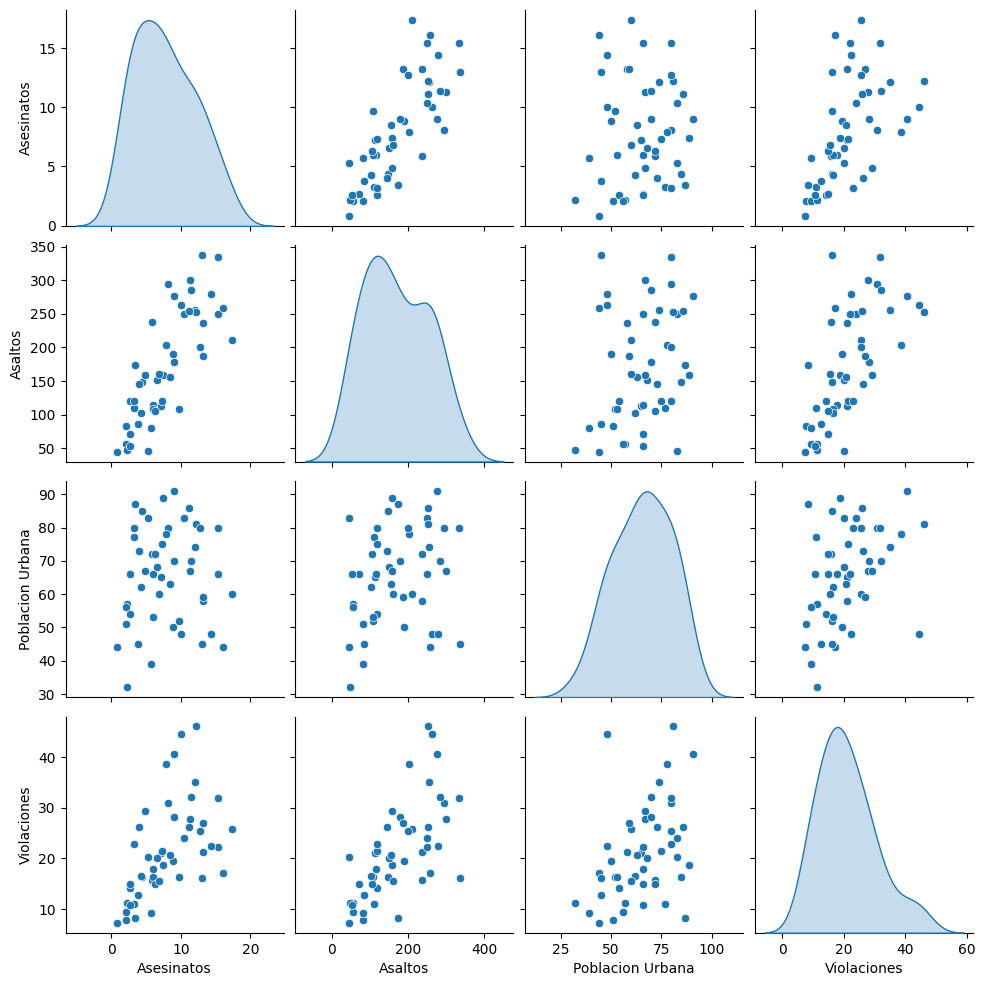

In [35]:
# Visualizo la relación entre variables
sns.pairplot(df_crimenes, diag_kind='kde')
plt.show()


# Preprocesamiento de Datos

In [36]:
# Borro los indices del dataset.
data = df_crimenes.reset_index(drop=True)

# Renombro la columna "Poblacion Urbana"
data.rename(columns={'Poblacion Urbana': 'Poblacion_Urbana'}, inplace=True)

# Selecciono las características relevantes para el clustering
features = data[['Asesinatos', 'Asaltos', 'Poblacion_Urbana', 'Violaciones']]

# Normalizo las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


# Selección del Modelo y Entrenamiento:

El modelo que seleccionamos es K-means que es un algoritmo de aprendizaje no supervisado que se utiliza para la agrupación de datos. Su objetivo es dividir un conjunto de datos en k grupos (clusters) basándose en características similares. El "k" en K-means representa el número de clusters que el algoritmo intenta formar. El objetivo del algoritmo es minimizar la varianza intra-cluster, es decir, la suma de las distancias cuadradas entre cada punto y el centroide de su cluster. Esto se conoce como la inercia del cluster.

El método que vamos a utilizar para determinar el número óptimo de clusters es el Método o Curva del Codo, que implica ejecutar K-means en el conjunto de datos para diferentes valores de K y observar la variación explicada. El valor donde la variación comienza a aplanarse se considera el número óptimo de clusters.

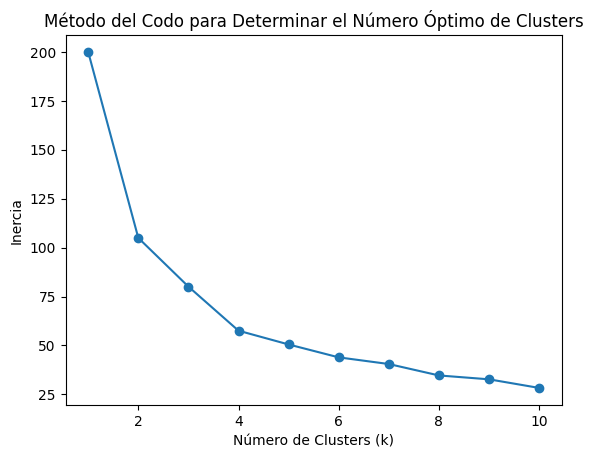

In [37]:
# Selecciono el rango de valores de k (número de clusters)
k_values = range(1, 11)

# Calculo la inercia (suma de cuadrados de distancias intra-cluster) para cada valor de k
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Grafico la Curva del Codo
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()

In [38]:
# Aplico de K-means con 2 clusters, resultado obtenido de la Curva del Codo.
kmeans = KMeans(n_clusters=2,init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(features_scaled)


# Evaluación del Modelo

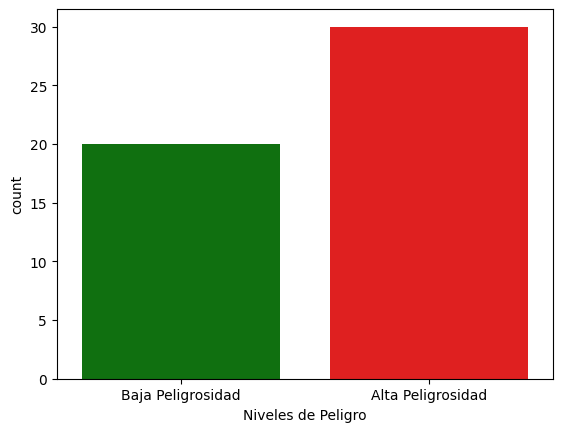

In [39]:
# Mapeo etiquetas a los clusters
cluster_labels = {0: 'Alta Peligrosidad', 1: 'Baja Peligrosidad'}
data['Niveles de Peligro'] = data['Cluster'].map(cluster_labels)

# Analizo la distribución de los clústeres
sns.countplot(x='Niveles de Peligro', data=data, palette={'Alta Peligrosidad': 'red', 'Baja Peligrosidad': 'green'})
plt.show()

# Interpretación de Resultados



In [40]:
# Analizo estadísticas descriptivas por clúster
cluster_stats = data.groupby('Cluster').mean()
cluster_stats

<ipython-input-40-39f6e07dc801>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Asesinatos,Asaltos,Poblacion_Urbana,Violaciones
Cluster,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


 # Visualización de Resultados

In [42]:
# Cargo el archivo de geometría de estados
gdf_estados_unidos = gpd.read_file("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson")

# Uno el DataFrame de datos con el GeoDataFrame de geometría
gdf_merged = pd.merge(gdf_estados_unidos, data, left_on='name', right_on='Estado')

# Mapeo etiquetas a los clusters
cluster_labels = {0: 'Baja Peligrosidad', 1: 'Alta Peligrosidad'}
gdf_merged['Nivel de Peligrosidad'] = gdf_merged['Cluster'].map(cluster_labels)

# Creo un gráfico choropleth con Plotly Express
fig = px.choropleth(gdf_merged,
                    geojson=gdf_merged.geometry,
                    locations=gdf_merged.index,
                    color='Niveles de Peligro',
                    hover_name='name',
                    title='Niveles de peligro en los distintos estados de EE.UU.(Crímenes en 1973)',
                    color_discrete_map={'Baja Peligrosidad': 'green', 'Alta Peligrosidad': 'red'})

# Muestro el gráfico
fig.show()


# Conclusión:
La aplicación del modelo K-means reveló una distribución de estados en dos clusters. El Cluster 0, representado por la categoría "Baja Peligrosidad", incluye estados que exhiben características asociadas con tasas más bajas de crímenes, mientras que el Cluster 1, denominado "Alta Peligrosidad", agrupa estados con indicadores que sugieren niveles más altos de actividad delictiva.

La visualización de la distribución de estados en estos clusters muestra cómo los estados se dividen en las categorías de peligrosidad. Esta información puede ser valiosa para comprender patrones de crímenes en diferentes regiones y orientar estrategias de aplicación de la ley y políticas de seguridad pública.
